# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [5]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /home/ashot/Documents/GitHub/Cauchy.csv
100%|██████████████████████████████████████| 18.7k/18.7k [00:00<00:00, 14.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /home/ashot/Documents/GitHub/Weibull.csv
100%|███████████████████████████████████████| 17.9k/17.9k [00:00<00:00, 470kB/s]


In [6]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [12]:
# Записываем выборку из файла в список sample
sample = pd.read_csv("Cauchy.csv")["sample"].values
sample.shape

(1000,)

In [13]:
# Логарифм функции правдоподобия (сумма логарифмов значений плотности на каждом значении из sample).
def likehood(sample, loc_):
    return np.sum(cauchy.logpdf(sample, loc=loc_, scale=1))

In [14]:
# Ищем максимум логарифмической функции правдоподобия по loc_, перебирая его от -1000 до 1000 с шагом 0.01.
# Выводится значение параметра сдвига, на котором достигается максимум.

# ценка по всей выборке
from scipy.stats import cauchy
left_bound = -1000
right_bound = 1000
step = 0.01
estimation = left_bound + step * (np.argmax(np.array([likehood(sample, loc_) 
                                               for loc_ in np.arange(left_bound, right_bound, step)])))

In [15]:
print(estimation)

207.98000000000002


In [16]:
# оценка по первым 10 измерениям
sample = np.array(sample[:10])

left_bound = -1000
right_bound = 1000
step = 0.01
estimation = left_bound + step * (np.argmax(np.array([likehood(sample, loc_) 
                                               for loc_ in np.arange(left_bound, right_bound, step)])))
print(estimation)


208.52999999999997


In [17]:
#оценка по первым 100 измерениям
sample = np.array(sample[:100])

left_bound = -1000
right_bound = 1000
step = 0.01
estimation = left_bound + step * (np.argmax(np.array([likehood(sample, loc_) 
                                               for loc_ in np.arange(left_bound, right_bound, step)])))
print(estimation)

208.52999999999997


### Вывод

Мы оценили параметр сдвига в распределении Коши методом правдоподобия по всей выборке, по первым 10 измерениям и по первым 100 измерениям. В первом случае оценка параметра 𝑥0=−208.04, во втором — 𝑥0=-208.14, в третьем — 𝑥0=-208.14. Как мы видим, результаты хоть и различаются, но не намного.

Сравните полученные результаты с `sps.cauchy.fit`

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [18]:
sample = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


In [19]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import weibull_min

# Логарифм функции правдоподобия (сумма логарифмов значений плотности на каждом значении из sample).
# log_shape - десятичный логарифм параметра формы. Аргументтом logpdf является число 10 в степени log_shape.
def likehood(sample, log_shape):
    return np.sum(weibull_min.logpdf(sample, 10 ** log_shape))

Сделайте вывод.

**Вывод**

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [20]:
# оценка по всей выборке

# Ищем максимум логарифмической функции правдоподобия по shape в логарифмическом масштабе, перебирая его от -2 до 2 с шагом 0.001.
# Выводится значение параметра формы, на котором достигается максимум.
left_bound = -2
right_bound = 2
step = 0.001
estimation = 10 ** (left_bound + step * (np.argmax(np.array([likehood(sample, log_shape) 
                                               for log_shape in np.arange(left_bound, right_bound, step)]))))
print(estimation)

0.01


In [21]:
# оценка по первым четырем годам

# Изменяем выборку.
sample = sample[:(365 * 4)]

left_bound = -2
right_bound = 2
step = 0.001
estimation = 10 ** (left_bound + step * (np.argmax(np.array([likehood(sample, log_shape) 
                                               for log_shape in np.arange(left_bound, right_bound, step)]))))
print(estimation)

0.01


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?


# Вывод

Мы оценили параметр формы в распределении Вейбулла методом правдоподобия по всей выборке и по ее первым 1460 значениям. В обоих случаях оценка параметра сдвига оказалась равной $\gamma^* = 0.01$.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [22]:
theta = 3
N = int(1e3)

norm_sample = sps.norm.rvs(size=N, scale=np.sqrt(theta))
uniform_sample = sps.uniform.rvs(size=N, scale=theta)
gamma_sample = sps.gamma.rvs(size=N, scale=theta, a=1)
length_of_samples = np.arange(1, N + 1)

norm_hat_theta = np.cumsum(norm_sample ** 2) / length_of_samples
uniform_hat_theta = 2 * (np.cumsum(uniform_sample) / length_of_samples)
gamma_hat_theta = np.cumsum(gamma_sample) / length_of_samples

In [23]:
info_about_distributions = ['$\\mathcal{N}(0, \\theta)$', '$U[0, \\theta]$', '$Г(1, \\theta)$']
list_of_estimators = [norm_hat_theta, uniform_hat_theta, gamma_hat_theta]

def print_plot(list_of_estimators, info_about_distributions):
  plt.figure(figsize=(15, 8))
  for estimator, info in zip(list_of_estimators, info_about_distributions):
    plt.plot(length_of_samples, np.abs(estimator - theta), label=info)
  plt.legend(fontsize=15, loc='best')
  plt.ylim(0, theta)
  plt.xlim(0, N)
  plt.title('Estimators over distributions samples where $\\theta = {}$'.format(theta), fontsize=20)
  plt.ylabel('Difference between estimator and $\\theta$: $|\\theta^* - \\theta|$', fontsize=15)
  plt.xlabel('size of our sample', fontsize=15)
  plt.show()

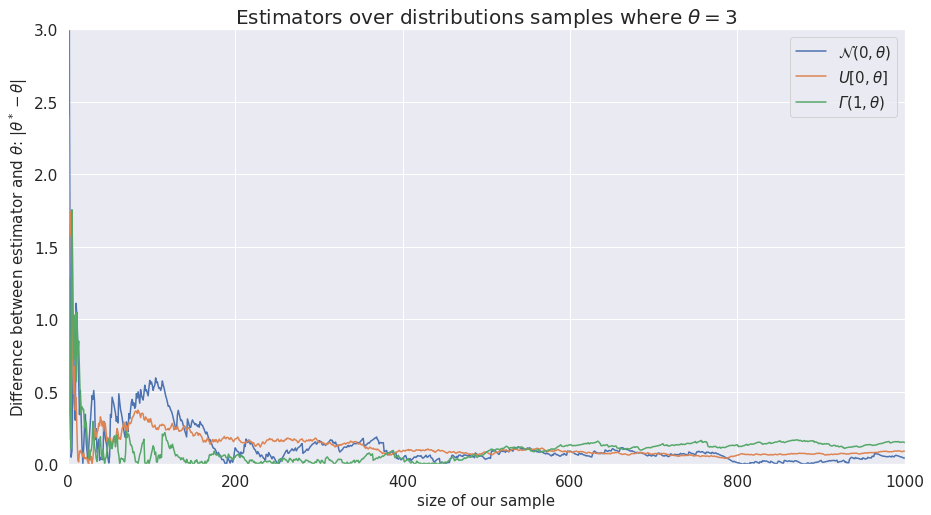

In [24]:
print_plot(list_of_estimators, info_about_distributions)

**Вывод:** Заметим, что модуль разности во всех распределениях стремится к нулю. Стоит отметить ещё, что наши оценки состоятельные, сильно-состоятельные и асимптотически-нормальные.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [25]:
# Создадим функцию для генерации нашего бутстрепа
size = list(range(100, 1001, 100))
size_of_bootstrap = [10, 50] + size

def generate_bootstrap(distribution, size_of_bootstrap):
    variances_of_theta = []
    means_of_theta = []
  
    for k in size_of_bootstrap:
        sample = distribution[:k]
        bootstrap_sample = sample[sps.randint.rvs(low=0, high=k, size=(k, k))]
        length_of_bts_sample = np.arange(1, bootstrap_sample.size + 1)
        if distribution is norm_sample:
            theta_hat = np.cumsum(bootstrap_sample ** 2) / length_of_bts_sample
        elif distribution is uniform_sample:
            theta_hat = 2 * (np.cumsum(bootstrap_sample) / length_of_bts_sample)
        elif distribution is gamma_sample:
            theta_hat = np.cumsum(bootstrap_sample) / length_of_bts_sample
        else:
            print("An error occurred while selecting a distribution :(")
            break
        mean_theta = np.mean(theta_hat)
        means_of_theta.append(mean_theta)
        variances_of_theta.append(np.mean(theta_hat ** 2) - (mean_theta ** 2))
    return np.array(means_of_theta), np.array(variances_of_theta)

In [26]:
# Создадим функцию для построения графика наших распределений
def print_plot(distribution, size_of_bootstrap, color, info):
  means, variances = generate_bootstrap(distribution, size_of_bootstrap)
  standard_deviation = np.sqrt(variances)
  
  plt.figure(figsize=(15, 8))
  plt.plot(size_of_bootstrap, means, color=color)
  plt.fill_between(size_of_bootstrap, y1=means - standard_deviation,
                   y2 = means + standard_deviation, alpha=0.2, color=color)
  plt.xticks(np.arange(100, 1001, 100))
  plt.title('The average spread relative to the mean of the estimator of the distribution {}'.format(info), fontsize=20)
  plt.ylabel('mean of estimator', fontsize=15)
  plt.xlabel('size of our sample', fontsize=15)
  plt.show()
  

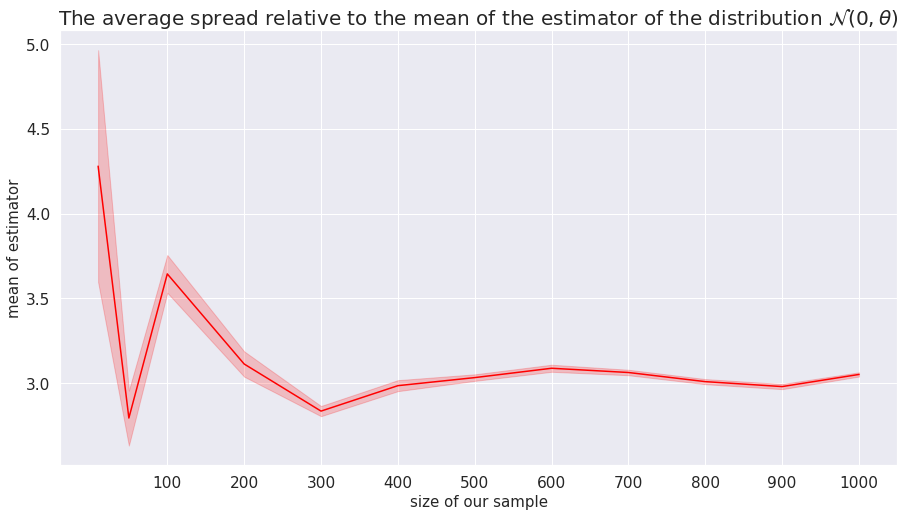

In [27]:
# Рассмотрим нормальное распределение
norm_info = '$\\mathcal{N}(0, \\theta)$'
print_plot(norm_sample, size_of_bootstrap, 'red', norm_info)

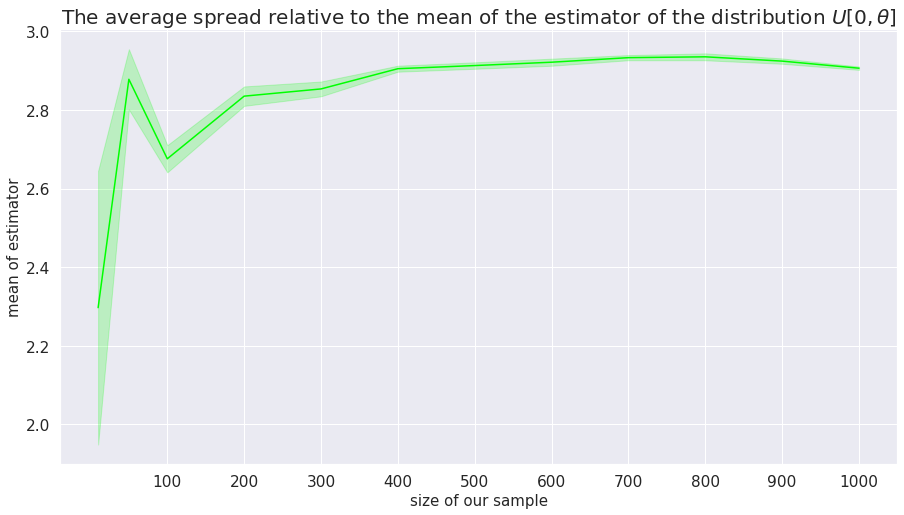

In [28]:
# Рассмотрим равномерное распределение
uniform_info = '$U[0, \\theta]$'
print_plot(uniform_sample, size_of_bootstrap, 'lime', uniform_info)

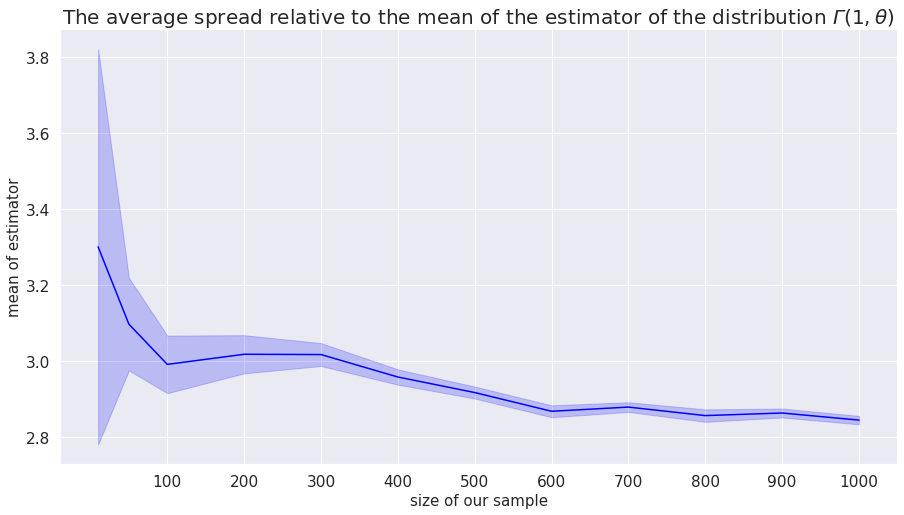

In [29]:
# Рассмотрим гамма распределение
gamma_info = '$Г(1, \\theta)$'
print_plot(gamma_sample, size_of_bootstrap, 'blue', gamma_info)

**Вывод:** Исходя из построенных графиков можно сделать вывод, что с увеличением размера выборки бутстрепа, средняя их оценок $\hat\theta$ становится все ближе и ближе к реальному значению нашего параметра.